## Loading data

In [1]:
import json
import numpy as np

with open('../data/squad/train-v1.1.json') as json_data:
    d = json.load(json_data)

## Number of questions

In [2]:
n = 0
for article in d['data']:
    for paragraph in article['paragraphs']:
        n += len(paragraph['qas'])
print("Number of questions:", n)

Number of questions: 87599


## Number of articles and their parts

In [3]:
print("Number of articles:", len(d['data']))

parts = []
for article in d['data']:
    parts.append(len(article['paragraphs']))
print("Number of articles parts:", int(np.mean(parts)))

Number of articles: 442
Number of articles parts: 42


## Context length distribution and number of questions distribution

In [4]:
context_length = []
for article in d['data']:
    for paragraph in article['paragraphs']:
        context_length.append(len(paragraph['context']))
    
questions = []
for article in d['data']:
    for paragraph in article['paragraphs']:
        questions.append(len(paragraph['qas']))

percentiles = [0, 20, 40, 60, 80, 100]
print("Context length distribution")
for percentile in percentiles:
    print("Percentile", percentile, ":", int(np.percentile(context_length, percentile)))
    
print("===================================")
    
percentiles = [0, 20, 40, 60, 80, 100]
print("Number of questions")
for percentile in percentiles:
    print("Percentile", percentile, ":", int(np.percentile(questions, percentile)))

Context length distribution
Percentile 0 : 151
Percentile 20 : 525
Percentile 40 : 621
Percentile 60 : 744
Percentile 80 : 941
Percentile 100 : 3706
Number of questions
Percentile 0 : 1
Percentile 20 : 4
Percentile 40 : 4
Percentile 60 : 5
Percentile 80 : 5
Percentile 100 : 25


## First words in questions

In [5]:
first_words = []
for article in d['data']:
    for paragraph in article['paragraphs']:
        for item in paragraph["qas"]:
            first_words.append(item['question'].split()[0])

In [6]:
from collections import Counter
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

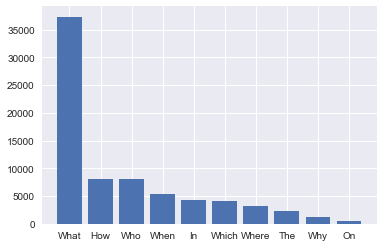

In [7]:
n = 10
first_words_dict = Counter(first_words)
plt.bar(range(n), [j for i,j in first_words_dict.most_common(n)], align='center')
plt.xticks(range(n), [i for i,j in first_words_dict.most_common(n)])

plt.show()

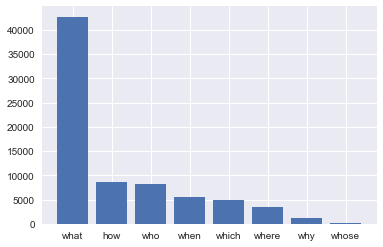

In [8]:
question_words = ["where", "who", "when", "what", "why", "whose", "which", "how"]
first_words = []
for article in d['data']:
    for paragraph in article['paragraphs']:
        for item in paragraph['qas']:
            for i in range(3):
                try:
                    first_words.append(item['question'].lower().split()[i])
                except:
                    pass
                
first_words_dict = Counter(first_words)
new_dict = {}
for question in question_words:
    new_dict[question] = first_words_dict[question]
    
import operator
new_dict = sorted(new_dict.items(), key=operator.itemgetter(1), reverse=True)

plt.bar(range(len(question_words)), [j for i, j in new_dict], align='center')
plt.xticks(range(len(question_words)), [i for i, j in new_dict])

plt.show()

## Answers

In [9]:
article['paragraphs'][0]['qas'][0]

{'answers': [{'answer_start': 105, 'text': 'Nepal'}],
 'id': '57359bbcdc94161900571ee9',
 'question': 'What country is Kathmandu the capital of?'}

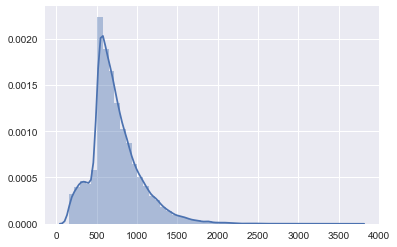

In [10]:
sns.distplot(context_length);

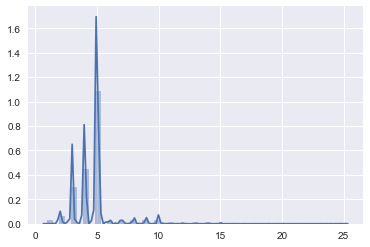

In [11]:
sns.distplot(questions);